# Six-bar mechanism balancing

###### Luis Eduardo Robles Jiménez

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Constraints

$$ -0.16m \leq x_{cn}, y_{cn} \leq 0.16m $$

$$ 0.005m \leq t_{cn} \leq 0.04m $$

### Read data from a file

In [24]:
"""
# The very best examples, to understand how good solutions behave
fitness = np.loadtxt("1671649703Fitness.txt")
samples = np.loadtxt("1671649703Population.txt")
# Solutions under 1.0
fitness = np.loadtxt("1671919014Fitness.txt")
samples = np.loadtxt("1671919014Population.txt")
# Broader space
# 10% best solutions, 50% Under 1.0 solutions, 50% random solutions.
samples = np.loadtxt("1671988185Population.txt")
fitness = np.loadtxt("1671988185Fitness.txt")
shForces = np.loadtxt("1671988185ShForces.txt")
shMoments = np.loadtxt("1671988185ShMoments.txt")
# More pymoo results
samples = np.loadtxt("1674756309Population.txt")
fitness = np.loadtxt("1674756309Fitness.txt")
shForces = np.loadtxt("1674756309ShForces.txt")
shMoments = np.loadtxt("1674756309ShMoments.txt")
# 114 crazy estimations with a random uniform alpha (0 pairs below 1)
samples = np.loadtxt("1675557893Population.txt")
fitness = np.loadtxt("1675557893Fitness.txt")
shForces = np.loadtxt("1675557893ShForces.txt")
shMoments = np.loadtxt("1675557893ShMoments.txt")
# DE with random alpha
samples = np.loadtxt("experiments/1676302198Population.txt")
fitness = np.loadtxt("experiments/1676302198Fitness.txt")
shForces = np.loadtxt("experiments/1676302198ShForces.txt")
shMoments = np.loadtxt("experiments/1676302198ShMoments.txt")
# Pymoo
samples = np.loadtxt("experiments/1676338610Population.txt")
fitness = np.loadtxt("experiments/1676338610Fitness.txt")
shForces = np.loadtxt("experiments/1676338610ShForces.txt")
shMoments = np.loadtxt("experiments/1676338610ShMoments.txt")
"""
"""
"""
# Pymoo 3 weights
samples = np.loadtxt("experiments/1677893800Population.txt")
fitness = np.loadtxt("experiments/1677893800Fitness.txt")
shForces = np.loadtxt("experiments/1677893800ShForces.txt")
shMoments = np.loadtxt("experiments/1677893800ShMoments.txt")

print(samples.shape)
print(fitness.shape)
print(shForces.shape)
print(shMoments.shape)

(93, 9)
(93,)
(93,)
(93,)


### Variables comparison

In [25]:
import seaborn as sns
import pandas as pd

In [26]:
from BetaShF import *
from BetaShM import *

In [27]:
def objective(s, ShF, ShM, alpha = 0.5):
    assert len(s) == 15
    return (alpha)*ShF(s) + (1 - alpha)*ShM(s)

In [28]:
# t1 vs t2
index = np.random.randint(len(samples))
rango = 0.5
s = samples[index]
divs = 50
t1, t2 = s[2], s[2]
t1 = np.linspace(t1 - rango, t1 + rango, divs)
t2 = np.linspace(t2 - rango, t2 + rango, divs)
t1 = np.linspace(0.005, 0.04, divs)
t2 = np.linspace(0.005, 0.04, divs)
#t1 = np.linspace(0, 1, divs)
#t2 = np.linspace(-1, 0, divs)

In [29]:
X, Y = np.meshgrid(t1, t2)

In [30]:
Z = np.zeros((divs, divs))
for i in range(divs):
    for j in range(divs):
        print(f'\rCurrently running {i}, {j}', end = "")
        test = np.copy(samples[index])
        test[2] = X[i, j]
        test[5] = Y[i, j]
        test = np.array(list(test) + [0] * 6)
        Z[i, j] = objective(test, ShF, ShM)

Currently running 49, 49

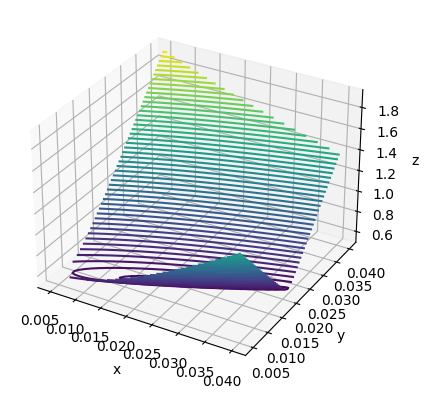

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [32]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [33]:
@widgets.interact(angle1 = (-180, 180), angle2 = (-180, 180))
def plot(angle1=0, angle2=0):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(angle1, angle2)

interactive(children=(IntSlider(value=0, description='angle1', max=180, min=-180), IntSlider(value=0, descript…